<a href="https://colab.research.google.com/github/hun9008/ML_TeamProject_24SS/blob/main/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


In [3]:
image_path = "/content/drive/MyDrive/ML_TeamProject/"
folders = ['images_gray_png', 'images_gray_jpg', 'images_png', 'images_jpg']
labels = ['mature', 'overripe', 'incipient', 'no']

In [ ]:
# zip 파일들 unzip
for folder in folders:
    zip_path = os.path.join(image_path, folder, f'{folder}.zip')
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.join(image_path, folder))

In [5]:
cd /content/drive/MyDrive/ML_TeamProject/

/content/drive/MyDrive/ML_TeamProject


In [4]:
image_jpg_path = "/content/drive/My Drive/ML_TeamProject/images_jpg"
image_png_path = "/content/drive/My Drive/ML_TeamProject/images_png"
image_gray_jpg_path = "/content/drive/My Drive/ML_TeamProject/images_gray_jpg"
image_gray_png_path = "/content/drive/My Drive/ML_TeamProject/images_gray_png"
os.chdir("/content/drive/My Drive/ML_TeamProject/images_png")
!ls

images_png.zip	incipient  mature  no  overripe


In [13]:
os.chdir("/content/drive/My Drive/ML_TeamProject/images_png")
!ls

images_png.zip	incipient  mature  no  overripe


In [14]:
image_path = image_png_path

In [15]:
os.chdir(os.path.join(image_path, 'overripe'))
with open('zero_centering.pkl', 'rb') as f:
     overripe = pickle.load(f)
     print('overripe : ', len(overripe))
os.chdir(os.path.join(image_path, 'no'))
with open('zero_centering.pkl', 'rb') as f:
     no = pickle.load(f)
     print('no : ', len(no))

os.chdir(os.path.join(image_path, 'mature'))
with open('zero_centering.pkl', 'rb') as f:
     mature = pickle.load(f)
     print('mature : ', len(mature))

os.chdir(os.path.join(image_path, 'incipient'))
with open('zero_centering.pkl', 'rb') as f:
     incipient = pickle.load(f)
     print('incipient : ', len(incipient))

overripe :  2000
no :  2000
mature :  2000
incipient :  2000


Dictionary to numpy array

In [16]:
# overripe의 모든 사진에 대해 반복
overripe_data_list = []

for filename, data in overripe.items():
    zero_centering_value = data.get('zero_centering')
    overripe_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
overripe_data = np.array(overripe_data_list)

# 확인을 위해 배열의 크기 출력
print("overripe_data shape:", overripe_data.shape)
no_data_list = []

for filename, data in no.items():
    zero_centering_value = data.get('zero_centering')
    no_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
no_data = np.array(no_data_list)

# 확인을 위해 배열의 크기 출력
print("no_data shape:", no_data.shape)

mature_data_list = []

for filename, data in mature.items():
    zero_centering_value = data.get('zero_centering')
    mature_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
mature_data = np.array(mature_data_list)

# 확인을 위해 배열의 크기 출력
print("mature_data shape:", mature_data.shape)

incipient_data_list = []

for filename, data in incipient.items():
    zero_centering_value = data.get('zero_centering')
    incipient_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
incipient_data = np.array(incipient_data_list)

# 확인을 위해 배열의 크기 출력
print("incipient_data shape:", incipient_data.shape)

overripe_data shape: (2000, 224, 224, 3)
no_data shape: (2000, 224, 224, 3)
mature_data shape: (2000, 224, 224, 3)
incipient_data shape: (2000, 224, 224, 3)


In [17]:
from tensorflow.keras.utils import to_categorical
# 데이터를 train/validation/test로 나누기
X = np.concatenate((overripe_data, no_data, mature_data, incipient_data), axis=0)
y = np.concatenate((np.zeros(overripe_data.shape[0]), np.ones(no_data.shape[0]),
                    2*np.ones(mature_data.shape[0]), 3*np.ones(incipient_data.shape[0])))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

(5600, 224, 224, 3)
(1200, 224, 224, 3)
(1200, 224, 224, 3)


In [18]:
del overripe, no, mature, incipient
del overripe_data, no_data, mature_data, incipient_data
del overripe_data_list, no_data_list, mature_data_list, incipient_data_list
del X, y
del y_train, y_temp, y_val, y_test

## ResNet50

In [11]:
def resnet50_model():
  import os
  import numpy as np
  from sklearn.model_selection import train_test_split
  from tensorflow.keras.applications import ResNet50
  from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
  from tensorflow.keras.models import Model
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.callbacks import EarlyStopping
  from tensorflow.keras.utils import to_categorical


  # ResNet50 모델 생성
  base_model = ResNet50(weights='imagenet', include_top=False)

  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  predictions = Dense(len(labels), activation='softmax')(x)

  model = Model(inputs=base_model.input, outputs=predictions)

  # 미세 조정 (Fine-tuning) 설정
  for layer in base_model.layers:
      layer.trainable = False

  model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  # early stopping 설정
  early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

  # 모델 학습
  history = model.fit(
      X_train,
      y_train_one_hot,
      epochs=50,
      batch_size=32,
      validation_data=(X_val, y_val_one_hot),
      callbacks=[early_stopping]
  )

  # 시각화를 통한 정확도 및 손실도 확인
  import matplotlib.pyplot as plt

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # 모델 평가
  test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
  print('Test accuracy:', test_acc)


## images_gray_jpg 학습

Epoch 1/50
175/175 [==============================] - 10s 40ms/step - loss: 1.3669 - accuracy: 0.3073 - val_loss: 1.3369 - val_accuracy: 0.3875
Epoch 2/50
175/175 [==============================] - 5s 28ms/step - loss: 1.3078 - accuracy: 0.3745 - val_loss: 1.3241 - val_accuracy: 0.3633
Epoch 3/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2775 - accuracy: 0.3887 - val_loss: 1.2554 - val_accuracy: 0.4217
Epoch 4/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2509 - accuracy: 0.4157 - val_loss: 1.2327 - val_accuracy: 0.4200
Epoch 5/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2284 - accuracy: 0.4273 - val_loss: 1.2208 - val_accuracy: 0.4050
Epoch 6/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2183 - accuracy: 0.4241 - val_loss: 1.2003 - val_accuracy: 0.4033
Epoch 7/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2067 - accuracy: 0.4382 - val_loss: 1.1837 - val_accuracy: 0.410

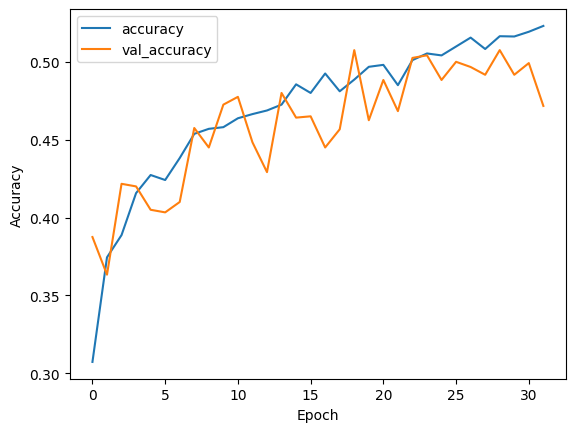

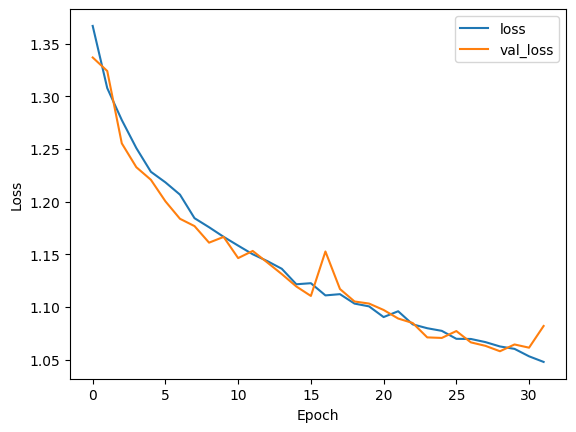

38/38 [==============================] - 1s 24ms/step - loss: 1.0685 - accuracy: 0.4917
Test accuracy: 0.49166667461395264


In [26]:
resnet50_model()

## images_gray_png 학습

Epoch 1/50
175/175 [==============================] - 14s 44ms/step - loss: 1.3615 - accuracy: 0.3241 - val_loss: 1.3315 - val_accuracy: 0.2517
Epoch 2/50
175/175 [==============================] - 5s 28ms/step - loss: 1.3084 - accuracy: 0.3700 - val_loss: 1.2895 - val_accuracy: 0.3958
Epoch 3/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2800 - accuracy: 0.4002 - val_loss: 1.2509 - val_accuracy: 0.4008
Epoch 4/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2564 - accuracy: 0.3934 - val_loss: 1.2402 - val_accuracy: 0.3933
Epoch 5/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2329 - accuracy: 0.4145 - val_loss: 1.2127 - val_accuracy: 0.4308
Epoch 6/50
175/175 [==============================] - 5s 29ms/step - loss: 1.2168 - accuracy: 0.4332 - val_loss: 1.1956 - val_accuracy: 0.4333
Epoch 7/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2040 - accuracy: 0.4282 - val_loss: 1.1852 - val_accuracy: 0.458

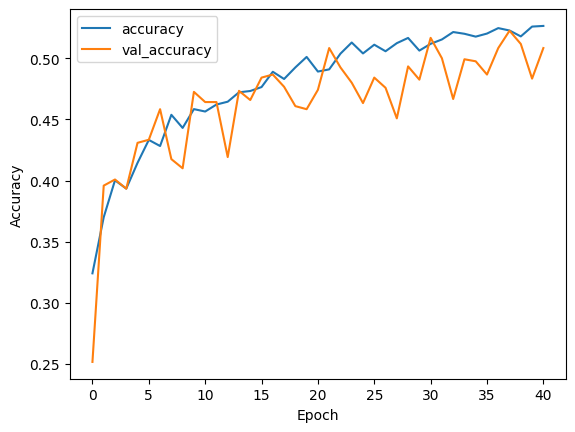

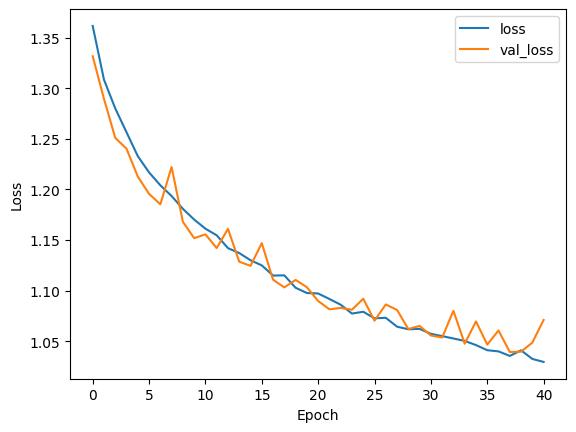

38/38 [==============================] - 1s 23ms/step - loss: 1.0494 - accuracy: 0.4975
Test accuracy: 0.4975000023841858


In [18]:
resnet50_model()

## images_jpg 학습

Epoch 1/50
175/175 [==============================] - 10s 42ms/step - loss: 1.3851 - accuracy: 0.2943 - val_loss: 1.3369 - val_accuracy: 0.3417
Epoch 2/50
175/175 [==============================] - 5s 28ms/step - loss: 1.3171 - accuracy: 0.3682 - val_loss: 1.2937 - val_accuracy: 0.3783
Epoch 3/50
175/175 [==============================] - 5s 29ms/step - loss: 1.2848 - accuracy: 0.3934 - val_loss: 1.2694 - val_accuracy: 0.3775
Epoch 4/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2639 - accuracy: 0.4025 - val_loss: 1.2460 - val_accuracy: 0.3783
Epoch 5/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2374 - accuracy: 0.4254 - val_loss: 1.2227 - val_accuracy: 0.4317
Epoch 6/50
175/175 [==============================] - 5s 29ms/step - loss: 1.2214 - accuracy: 0.4229 - val_loss: 1.2053 - val_accuracy: 0.4242
Epoch 7/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2067 - accuracy: 0.4380 - val_loss: 1.1956 - val_accuracy: 0.434

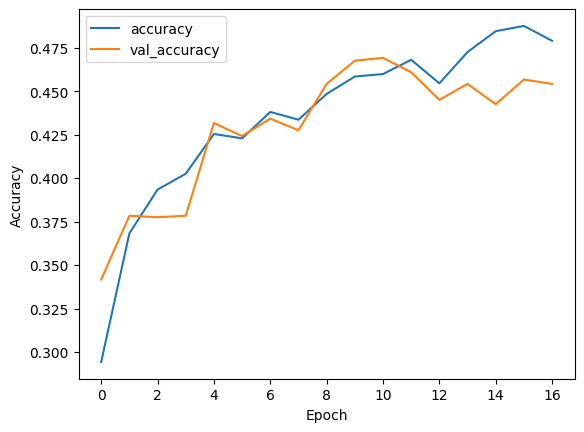

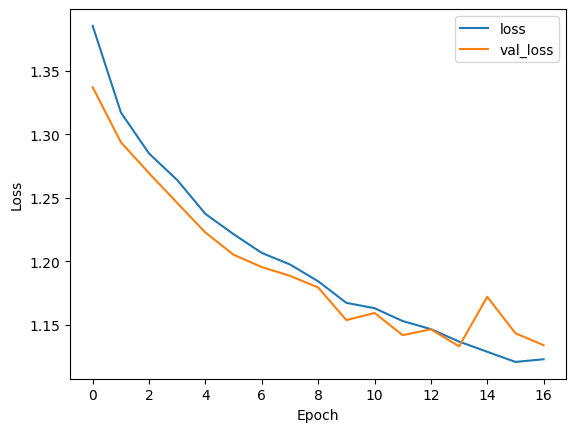

38/38 [==============================] - 1s 24ms/step - loss: 1.1517 - accuracy: 0.4375
Test accuracy: 0.4375


In [27]:
resnet50_model()

## images_png 학습

Epoch 1/50
175/175 [==============================] - 10s 42ms/step - loss: 1.3917 - accuracy: 0.2909 - val_loss: 1.3414 - val_accuracy: 0.2867
Epoch 2/50
175/175 [==============================] - 5s 29ms/step - loss: 1.3171 - accuracy: 0.3723 - val_loss: 1.3144 - val_accuracy: 0.3650
Epoch 3/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2848 - accuracy: 0.3930 - val_loss: 1.2625 - val_accuracy: 0.4025
Epoch 4/50
175/175 [==============================] - 5s 29ms/step - loss: 1.2607 - accuracy: 0.4145 - val_loss: 1.2330 - val_accuracy: 0.4300
Epoch 5/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2360 - accuracy: 0.4202 - val_loss: 1.2413 - val_accuracy: 0.3808
Epoch 6/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2214 - accuracy: 0.4318 - val_loss: 1.2137 - val_accuracy: 0.4208
Epoch 7/50
175/175 [==============================] - 5s 28ms/step - loss: 1.2064 - accuracy: 0.4332 - val_loss: 1.2345 - val_accuracy: 0.390

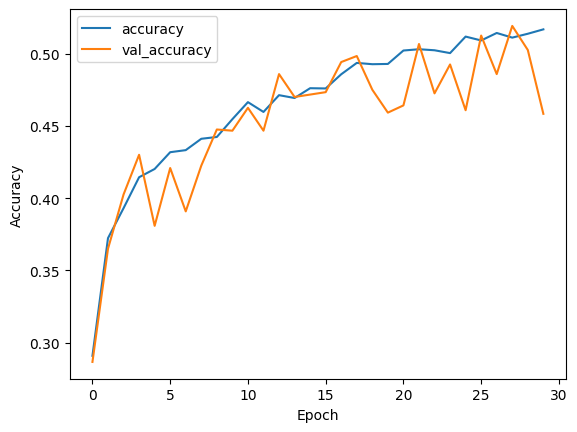

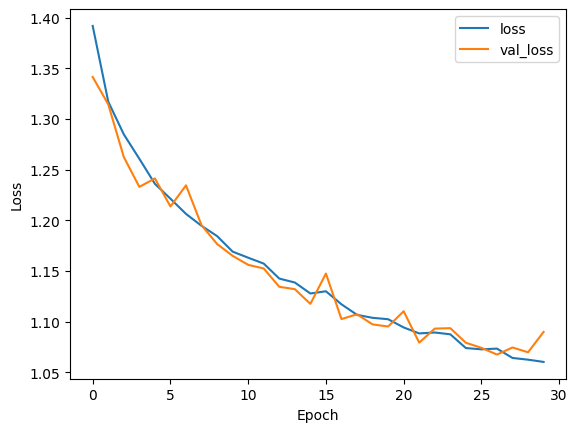

38/38 [==============================] - 1s 23ms/step - loss: 1.0855 - accuracy: 0.4783
Test accuracy: 0.47833332419395447


In [19]:
resnet50_model()